In [2]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import datetime
import duckdb

calling ds_preamble..
calling ds_helper...


,Group,ID number,Department,mid,a1,a2
0,201,20186978A,8C112-IT,42.0,31,10.0
1,201,20062656A,8C112-IT,84.0,84,82.0
2,201,20070054A,8C112-IT,48.0,84,52.0
3,201,20158549A,8C112-IT,68.0,93,61.0
4,201,20195428A,8C112-IT,90.0,88,80.0
...,...,...,...,...,...,...
260,203,20164396A,8C112-IT,86.0,95,90.0
261,203,20021940A,8C112-IT,74.0,82,83.0
262,203,19060186A,8C112-IT,82.0,95,99.0
263,203,20191141A,8C112-IT,48.0,70,47.0


,Group,Department,asm,score
0,201,8C112-IT,mid,42.0
1,201,8C112-IT,mid,84.0
2,201,8C112-IT,mid,48.0
3,201,8C112-IT,mid,68.0
4,201,8C112-IT,mid,90.0
...,...,...,...,...
790,203,8C112-IT,a2,90.0
791,203,8C112-IT,a2,83.0
792,203,8C112-IT,a2,99.0
793,203,8C112-IT,a2,47.0


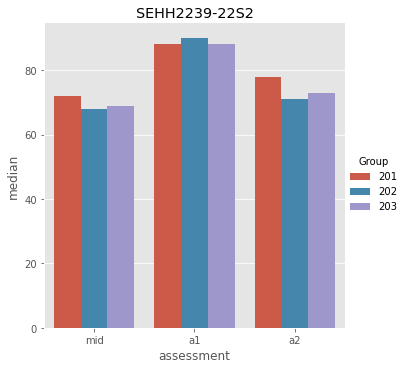

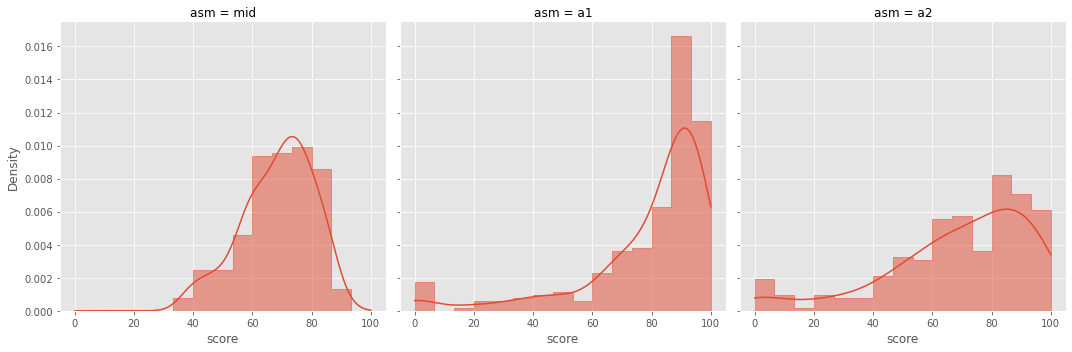

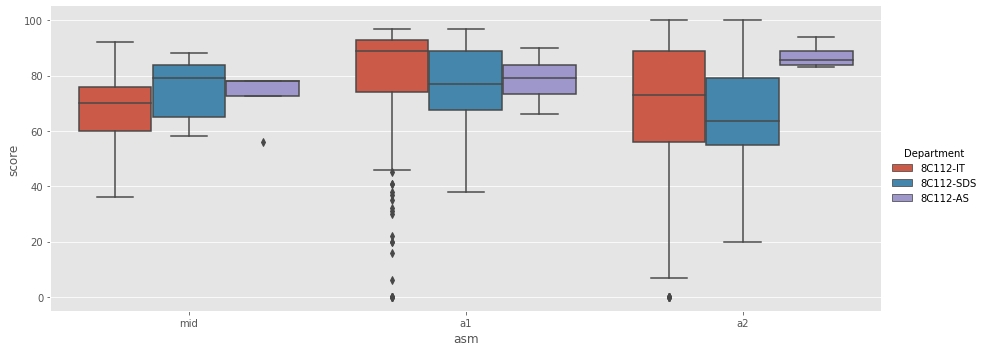

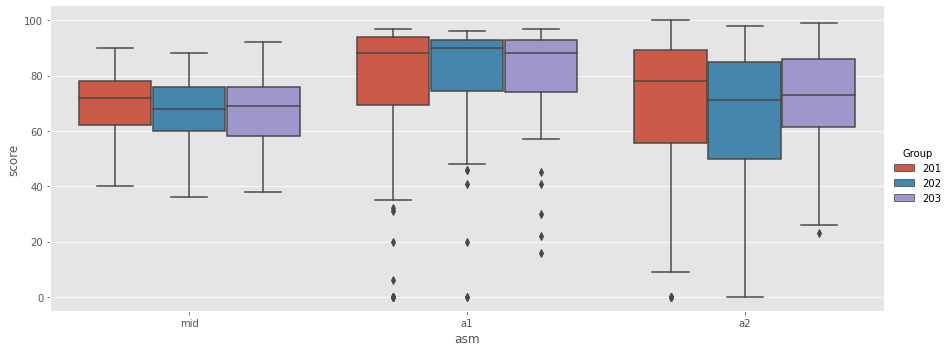

In [40]:
path = r'/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Academic/Notes of HKCC/HKCC Teaching/SEHH2239/AR/SEHH2239 AR Template with Exam 201.xlsx'
df = pd.read_excel(path, sheet_name='score_all', usecols='A:F')
df
# df.groupby('Group').agg(['mean','median','max'])

# sns.barplot(data=df, x='')

df_melt = df.melt(id_vars=['Group', 'Department'], value_vars=['mid','a1','a2'], var_name='asm', value_name='score')

df_melt

sns.catplot(data=df_melt, x='asm', y='score', hue='Group', estimator=np.median, kind='bar', ci=None).set(title='SEHH2239-22S2', xlabel='assessment', ylabel='median')

# sns.catplot(data=df.melt(id_vars=['Group', 'Department'], value_vars=['mid','a1','a2']), x='variable',y='value', hue='Department', estimator=np.median, kind='bar', ci=None).set(title='SEHH2239-22S2', xlabel='assessment', ylabel='median')

# sns.displot(data=df_melt, x='score',col='asm',kind='hist')
sns.displot(data=df_melt, x='score', col='asm', col_wrap=3, kind='hist', stat='density', kde=True, element='step', bins=15)


sns.catplot(data=df_melt, x='asm', y='score', hue='Department', kind='box', aspect=2.5)
sns.catplot(data=df_melt, x='asm', y='score', hue='Group', kind='swarm', aspect=2.5)

<Figure size 432x360 with 0 Axes>

<AxesSubplot:>

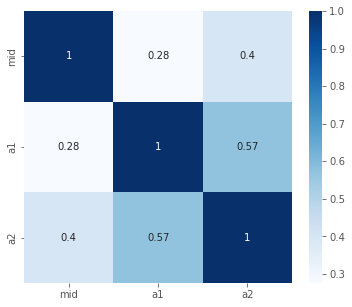

In [42]:
plt.figure(figsize=(6,5))
sns.heatmap(df.drop('Group',axis=1).corr(), annot=True,cmap="Blues")